angle: -0.8882369995117188
angle: 0.0
angle: -2.3859481811523438
(1, 512, 512) (5, 512, 512)
(4, 4, 2)


<Figure size 1440x1440 with 0 Axes>

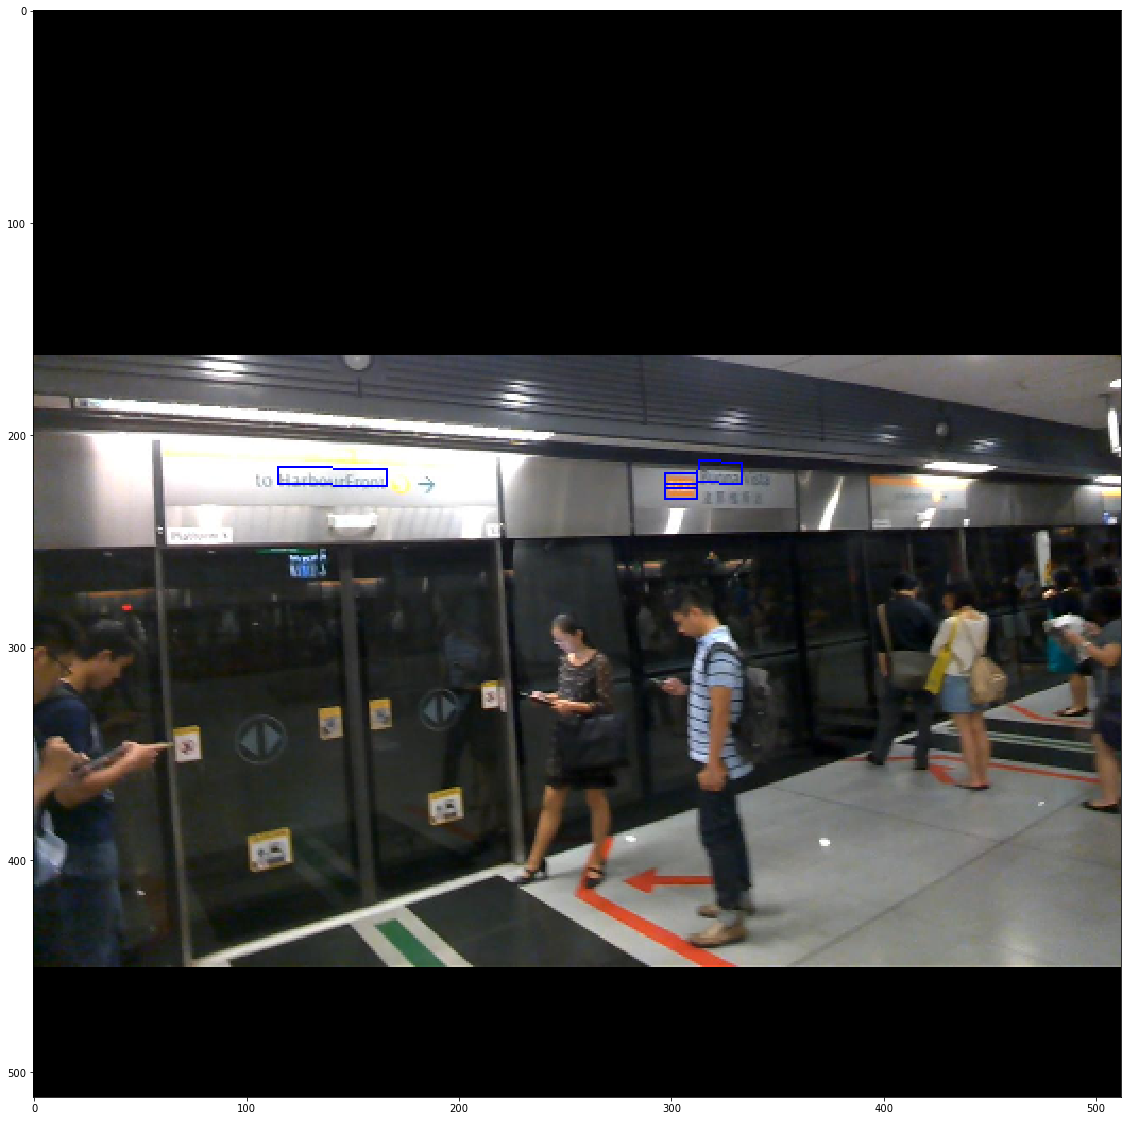

In [4]:
import sys
import os
sys.path.append(os.getcwd())
sys.path.append('../')
import matplotlib.pyplot as plt
import pytest
from FOTS.model import *
from FOTS.dataset import *
from FOTS.utils import *

dataset = ICDAR2015_Dataset()
img, boxes, labels  = dataset.readData(9)
img_aug, boxes_aug, labels_aug = dataset.augmenter(img, boxes, labels)

data_util = DataUtil_FOTS()
score_map, train_mask, index_map = data_util.generate_score_map(img_aug, boxes_aug, labels_aug)
geo_map = data_util.generate_geo_map(img_aug, boxes_aug, index_map, train_mask)

score_map = score_map * train_mask
score_map = score_map[np.newaxis,:,:]
geo_map = geo_map.transpose(2,0,1)

print(score_map.shape,geo_map.shape)

boxes = get_boxes_new(score_map, geo_map)
boxes = boxes[:,:8].reshape(-1,4,2)
print(boxes.shape)

boxes = boxes.astype(np.int32)

img_aug_a = cv2.polylines(img_aug,boxes,True,(0,0,255))

plt.figure(figsize=(20,20))
plt.imshow(img_aug_a)